# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore') 

## 1. Open the categoricals variable we created before.

- Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [3]:
data = pd.read_csv(r'C:\Users\claud\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

- First look at its main features (head, shape, info).

In [4]:
data.set_index('Customer')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
data.shape

(9134, 24)

In [7]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [8]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


- Rename the columns so they follow the PE8 (snake case).

In [9]:
data.columns = [x.lower().replace(" ", "_") for x in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

- Change effective to date column to datetime format.

In [10]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- Check NaN values per column.

In [11]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

- Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [12]:
def gettype(df):
    continuous = []
    discrete = []
    for i in df.columns:
        if df[i].dtypes == 'int64':
            discrete.append(i)
        if df[i].dtypes == 'float64':
            continuous.append(i)
    return print('continuous variables: ', continuous, '\n', 'discrete varibles: ', discrete)

In [13]:
gettype(data)

continuous variables:  ['customer_lifetime_value', 'total_claim_amount'] 
 discrete varibles:  ['income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


- Categoricals

In [14]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

In [15]:
colstoplot= []
for x in data.columns:
        a = data[x].dtypes == 'object'
        if a == True:
            colstoplot.append(x)
        else:
            pass

In [16]:
colstoplot

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [17]:
colstoplot.remove('customer')
colstoplot

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [18]:
for x in colstoplot:
    print(data[x].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

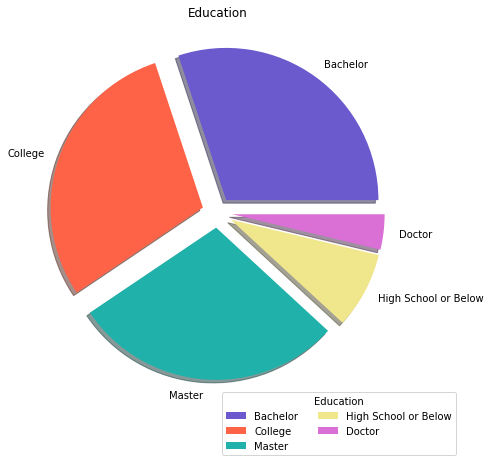

In [19]:
lines = data['education'].unique()
values = data['education'].value_counts()

# Formating
mycolors = ["slateblue", "tomato", "lightseagreen", 'khaki', 'orchid']

# Formating
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = lines, colors = mycolors, explode = myexplode, shadow = True)

# Put legend below plot
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2) #above
plt.legend(title = "Education", loc = "lower left", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  
# Show plot
plt.title("Education")
#plt.show()
plt.draw()

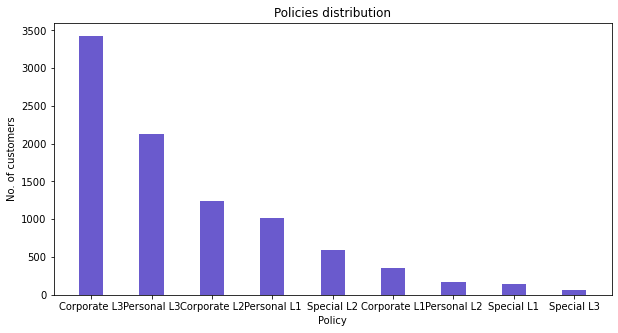

In [20]:
methods = data['policy'].unique()
values = data['policy'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, values, color ='slateblue', width = 0.4)
 
plt.xlabel("Policy")
plt.ylabel("No. of customers")
plt.title("Policies distribution")
plt.show()

In [21]:
def piechart(dfcolumn, giventitle):
    
    lines = dfcolumn.unique()
    values = dfcolumn.value_counts()

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(values, labels = lines)

    # Put legend below plot
    plt.legend(title = giventitle, loc = "lower left", bbox_to_anchor=(0.5, -0.15), ncol= 2)

    # Show plot
    plt.title(giventitle)
    
    return plt.draw()

In [22]:
def barplot(dfcolumn, giventitle):
    methods = dfcolumn.unique()
    values = dfcolumn.value_counts()

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(methods, values, color ='cornflowerblue', width = 0.4)

    plt.ylabel("Amount")
    plt.title(giventitle)
    
    return plt.show()

In [23]:
def plotall(dfcolumn, giventitle):
    return piechart(dfcolumn, giventitle), barplot(dfcolumn, giventitle)

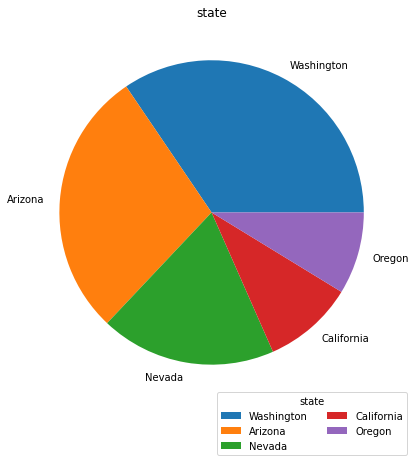

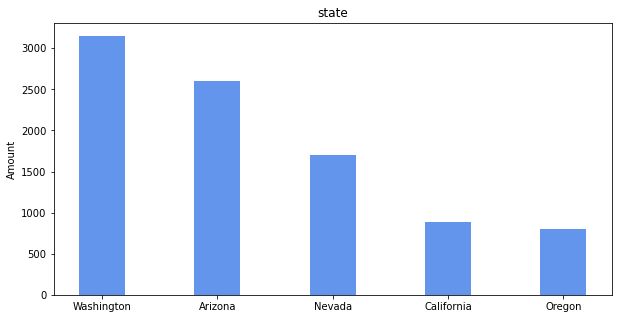

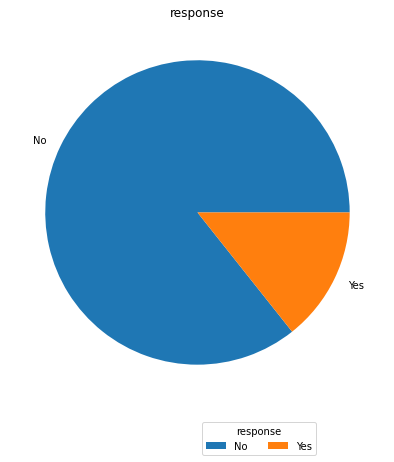

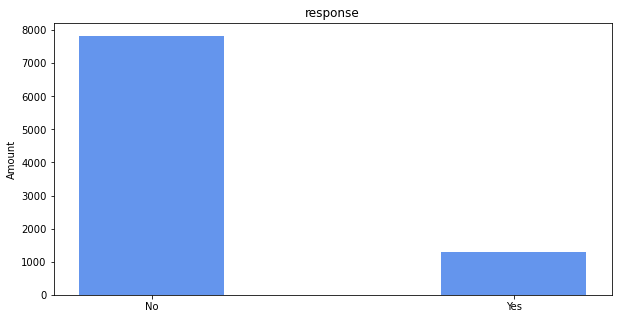

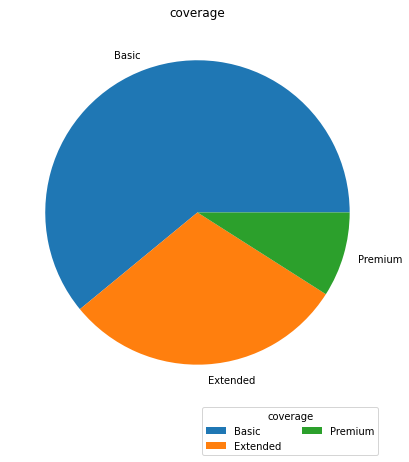

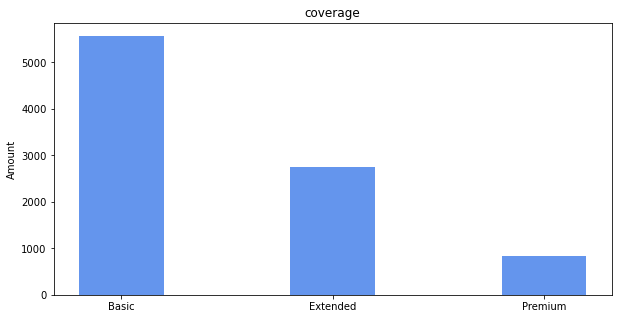

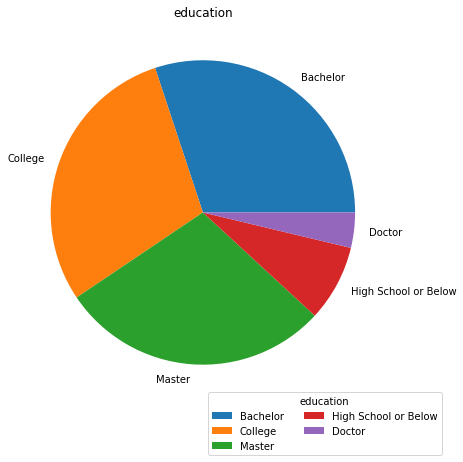

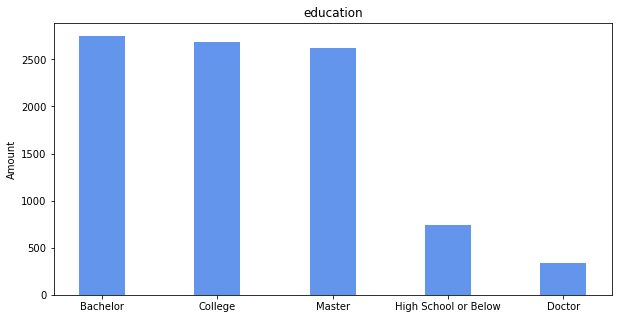

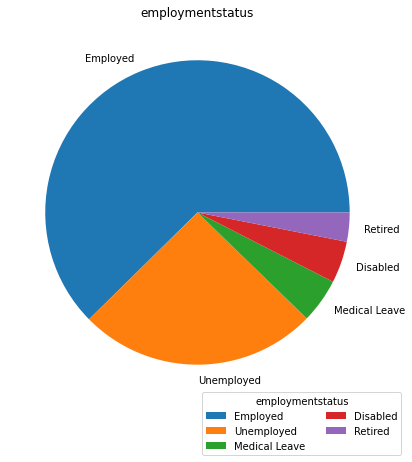

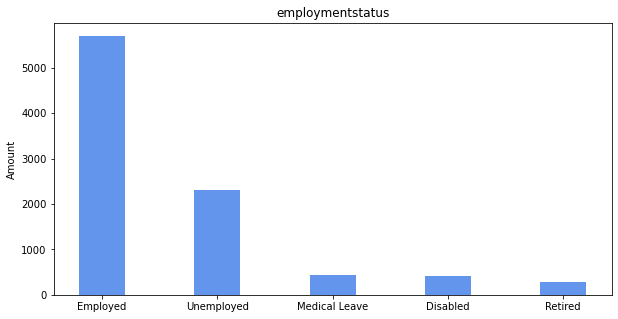

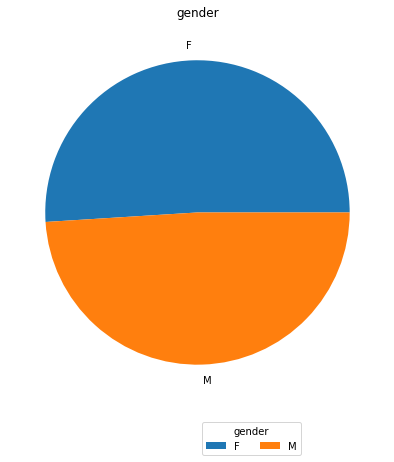

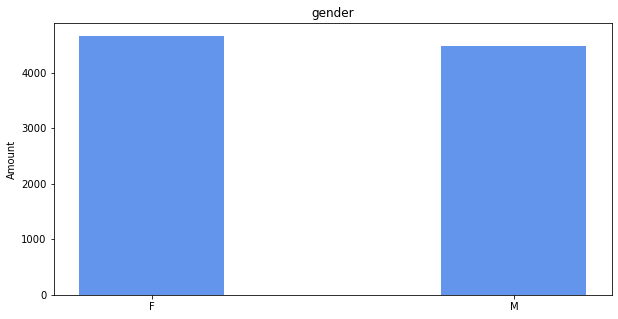

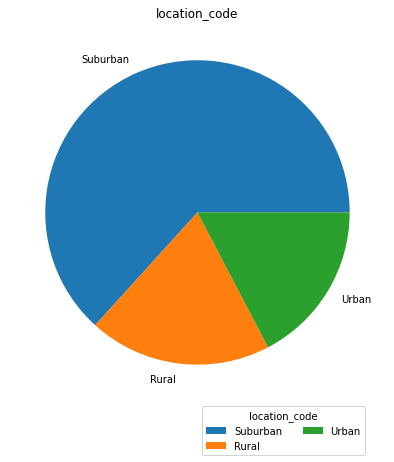

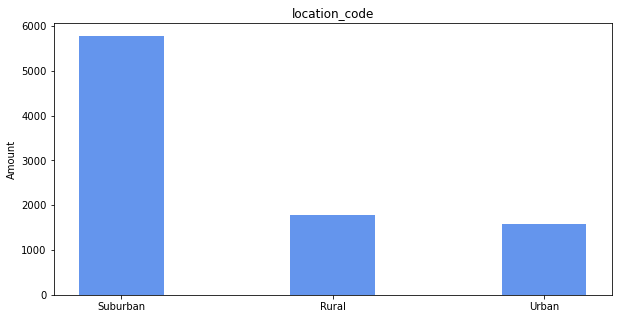

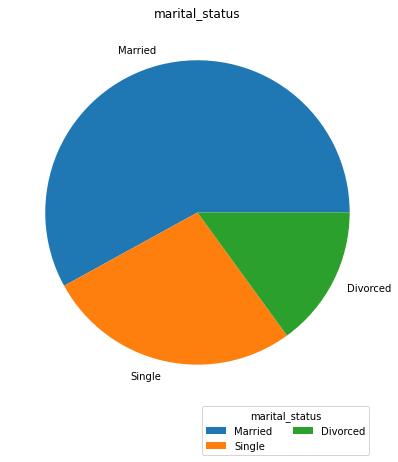

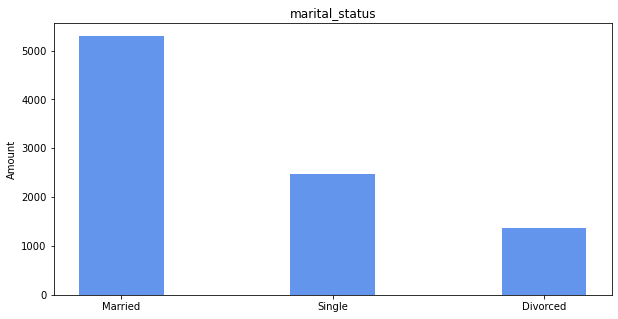

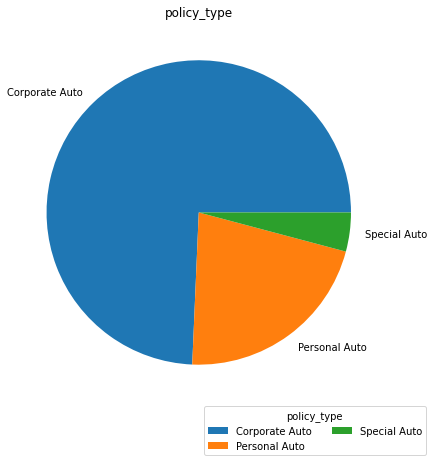

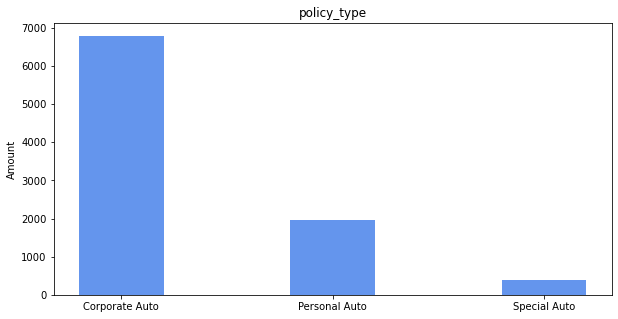

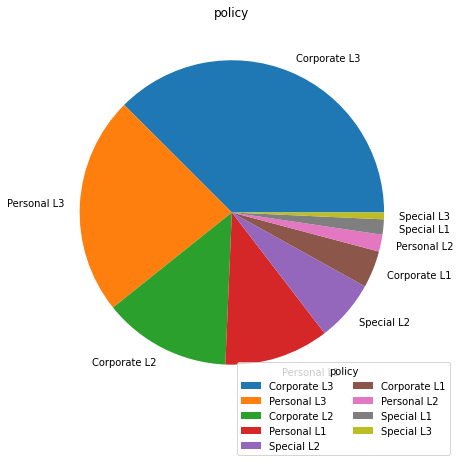

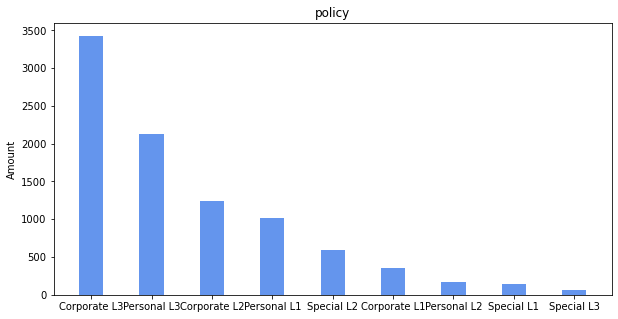

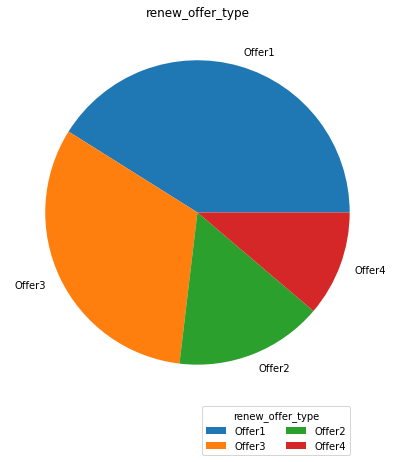

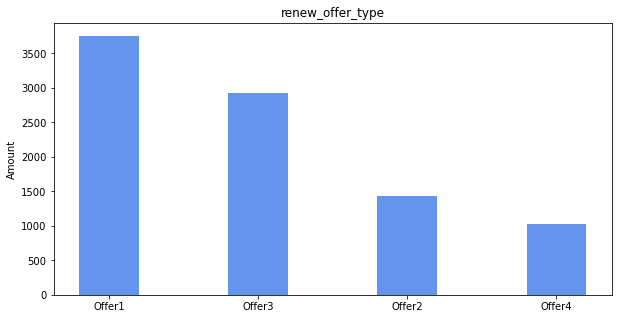

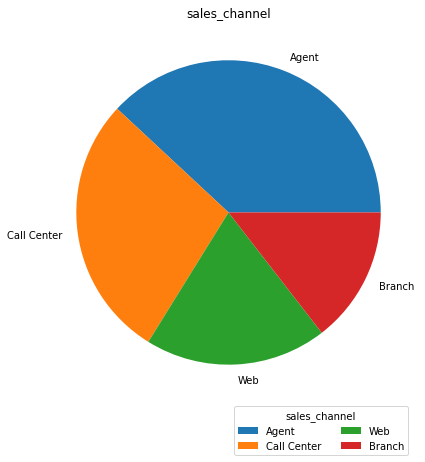

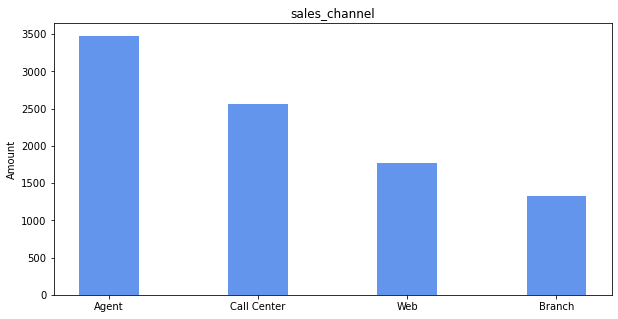

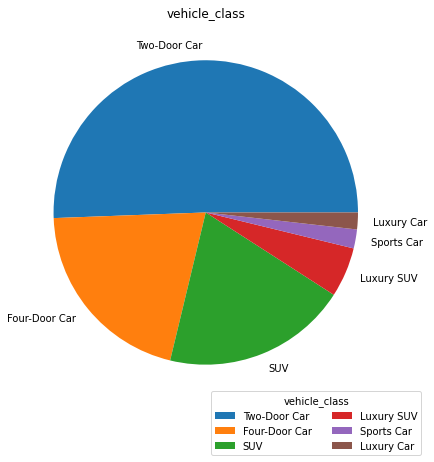

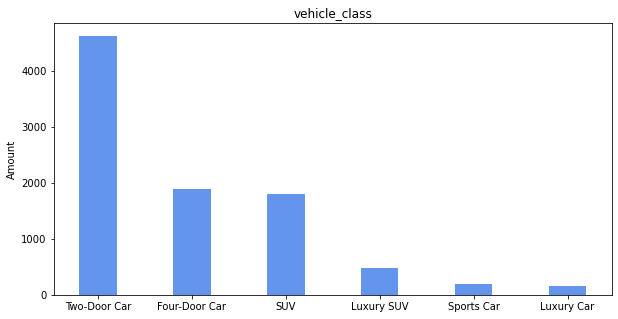

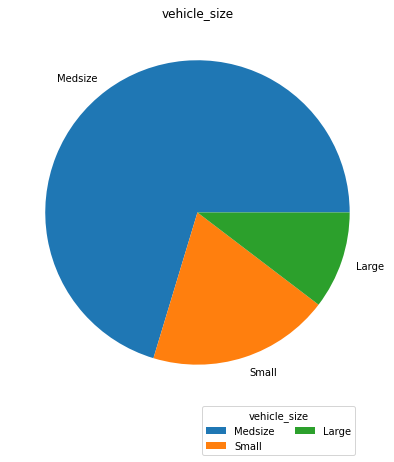

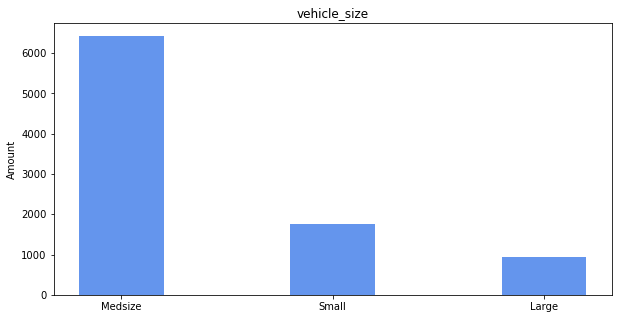

In [24]:
for x in colstoplot:
    plotall(data[x], x)

- Is possible to see that each variable has a different distribution, although some seems to be redundant

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

### Numerical data

In [25]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


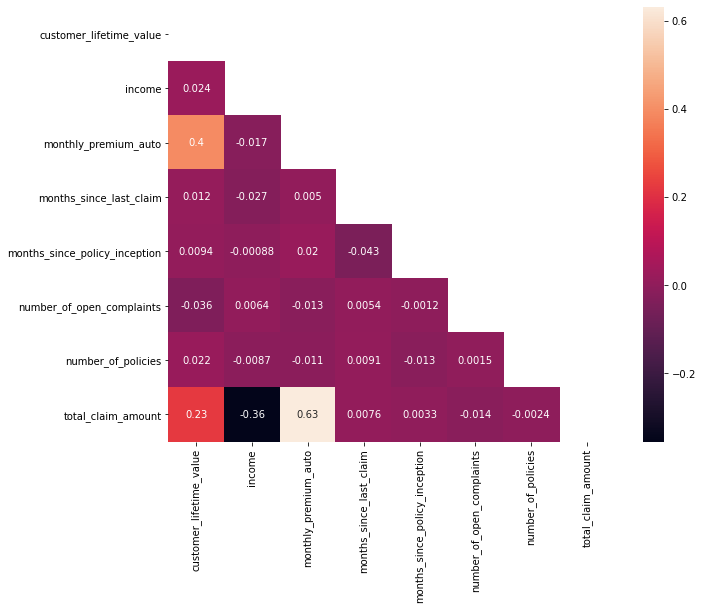

In [26]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)#change annot to False to hide the text, as it's unreadable
plt.show()

- Columns correlated:

monthly_premium_auto x customer_lifetime_value

monthly_premium_auto x total_claim_amount

customer_lifetime_value x total_claim_amount

income x total_claim_amount

Considering 'total_claim_amount' as the target we could drop the column 'monthly_premium_auto' considering time performance to run the model. If we don't have worries regarding time performance is better to keep information.

Considering 'customer_lifetime_value' as the target we could also drop the column 'monthly_premium_auto' considering time performanceto run the model. If we don't have worries regarding time performance is better to keep information.

#### 1st way to check VIF

In [28]:
data111 = data.copy()
numericals1 = data111.select_dtypes(np.number).drop(columns=['customer_lifetime_value'], axis=1)

In [30]:
# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif_numericals1 = add_constant(numericals1)
vif_numericals1.head()

,const,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1.0,56274,69,32,5,0,1,384.811147
1,1.0,0,94,13,42,0,8,1131.464935
2,1.0,48767,108,18,38,0,2,566.472247
3,1.0,0,106,18,65,0,7,529.881344
4,1.0,43836,73,12,44,0,1,138.130879


In [31]:
# To remove multicolinearity automatically:

threshold = 30

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals1), i)
              for i in range(len(vif_numericals1.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals1.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals1.columns[col_index]
        # drops that column
        vif_numericals1 = vif_numericals1.drop(column_name, axis=1)
    else:
        break

vif_numericals1

,0
number_of_open_complaints,1.000274
number_of_policies,1.000454
months_since_policy_inception,1.002638
months_since_last_claim,1.002756
income,1.248167
monthly_premium_auto,1.815995
total_claim_amount,2.076623


,const,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1.0,56274,69,32,5,0,1,384.811147
1,1.0,0,94,13,42,0,8,1131.464935
2,1.0,48767,108,18,38,0,2,566.472247
3,1.0,0,106,18,65,0,7,529.881344
4,1.0,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,1.0,71941,73,18,89,0,2,198.234764
9130,1.0,21604,79,14,28,0,1,379.200000
9131,1.0,0,85,9,37,3,2,790.784983
9132,1.0,21941,96,34,3,0,3,691.200000


In [32]:
# or manually

vif = pd.DataFrame(index=vif_numericals1.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numericals1), i),2)
                     for i in range(len(vif_numericals1.columns))]

In [33]:
vif.sort_values("VIF Factor")

,VIF Factor
months_since_last_claim,1.00
months_since_policy_inception,1.00
number_of_open_complaints,1.00
number_of_policies,1.00
income,1.25
monthly_premium_auto,1.82
total_claim_amount,2.08
const,17.31


- Testing another variable

In [50]:
data1 = data.copy()
numericals = data1.select_dtypes(np.number).drop(columns=['total_claim_amount'], axis=1)

In [51]:
# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif_numericals = add_constant(numericals)
vif_numericals.head()

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.0,2763.519279,56274,69,32,5,0,1
1,1.0,6979.535903,0,94,13,42,0,8
2,1.0,12887.431650,48767,108,18,38,0,2
3,1.0,7645.861827,0,106,18,65,0,7
4,1.0,2813.692575,43836,73,12,44,0,1


In [52]:
# To remove multicolinearity automatically:

threshold = 30

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]
        # drops that column
        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

,0
number_of_policies,1.001295
number_of_open_complaints,1.001420
income,1.002301
months_since_policy_inception,1.002441
months_since_last_claim,1.002828
monthly_premium_auto,1.188198
customer_lifetime_value,1.190178


,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.0,2763.519279,56274,69,32,5,0,1
1,1.0,6979.535903,0,94,13,42,0,8
2,1.0,12887.431650,48767,108,18,38,0,2
3,1.0,7645.861827,0,106,18,65,0,7
4,1.0,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,71941,73,18,89,0,2
9130,1.0,3096.511217,21604,79,14,28,0,1
9131,1.0,8163.890428,0,85,9,37,3,2
9132,1.0,7524.442436,21941,96,34,3,0,3


In [53]:
# or manually

vif = pd.DataFrame(index=vif_numericals.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numericals), i),2)
                     for i in range(len(vif_numericals.columns))]

In [54]:
vif.sort_values("VIF Factor")

,VIF Factor
income,1.00
months_since_last_claim,1.00
months_since_policy_inception,1.00
number_of_open_complaints,1.00
number_of_policies,1.00
customer_lifetime_value,1.19
monthly_premium_auto,1.19
const,17.18


- Again we can see correlation between 'monthly_premium_auto' and 'customer_lifetime_value'

#### 2nd way to check VIF

In [55]:
# This is the code to show how to use the __variance_inflation_factor__ function
# We are using add_constant here as VIF method in python expects the addition of a constant terms in the X features.
# It uses OLS but does not add the constant itself.
data_corr = data.select_dtypes([np.number]).copy().dropna()

vif = {}
data_corr = add_constant(data_corr)
print(data_corr.shape)

for i in np.arange(data_corr.shape[1]):    
    column_name = data_corr.columns[i]
    print(i, column_name)
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value
    
# Code to use the variance_inflation_factor technique to remove highly correlated columns

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

(9134, 9)
0 const
1 customer_lifetime_value
2 income
3 monthly_premium_auto
4 months_since_last_claim
5 months_since_policy_inception
6 number_of_open_complaints
7 number_of_policies
8 total_claim_amount


In [56]:
vif

{'const': 17.306762976334763,
 'customer_lifetime_value': 1.190707472806411,
 'income': 1.2487477434655483,
 'monthly_premium_auto': 2.020101096906491,
 'months_since_last_claim': 1.0028807818887264,
 'months_since_policy_inception': 1.002642098726184,
 'number_of_open_complaints': 1.0014585204651347,
 'number_of_policies': 1.001303954988111,
 'total_claim_amount': 2.0775457352322326}

In [57]:
data.select_dtypes(include=np.number).columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [58]:
df = data.copy()
df = df.dropna()[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']]

In [59]:
from patsy import dmatrices

features = "+".join(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'])

# get y and X dataframes based on this regression:
y, X = dmatrices('total_claim_amount ~' + features, df, return_type='dataframe')

In [60]:
X

,Intercept,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0
1,1.0,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0
2,1.0,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0
3,1.0,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0
4,1.0,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,71941.0,73.0,18.0,89.0,0.0,2.0
9130,1.0,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0
9131,1.0,8163.890428,0.0,85.0,9.0,37.0,3.0,2.0
9132,1.0,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0


In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [62]:
vif.round(1)

,VIF Factor,features
0,17.2,Intercept
1,1.2,customer_lifetime_value
2,1.0,income
3,1.2,monthly_premium_auto
4,1.0,months_since_last_claim
5,1.0,months_since_policy_inception
6,1.0,number_of_open_complaints
7,1.0,number_of_policies


### Categorical data

In [63]:
colstoplot

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [64]:
# when the result is a low p_value, so we can assume correlation between the variables

In [65]:
combination = []
p_valuecol = []

for y in colstoplot:
    for x in colstoplot:
        if (y == x) == True:
            pass
        else:
            # contingency table
            data_crosstab = pd.crosstab(data[y], data[x], margins=True)
            stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
            a = x + ' x ' + y
            combination.append(a)
            p_valuecol.append(p_value)

In [66]:
df = pd.DataFrame(list(zip(combination, p_valuecol)), columns =['Combination', 'p_value'])

In [67]:
df.sort_values('p_value')

,Combination,p_value
95,employmentstatus x marital_status,0.000000
57,location_code x employmentstatus,0.000000
112,policy x policy_type,0.000000
125,policy_type x policy,0.000000
58,marital_status x employmentstatus,0.000000
...,...,...
52,state x employmentstatus,0.999996
78,state x location_code,0.999999
5,location_code x state,0.999999
9,renew_offer_type x state,0.999999


- Taking the 1st and the last occurrences as examples

In [68]:
# contingency table
data_crosstab1 = pd.crosstab(data['employmentstatus'], data['marital_status'], margins=True)
data_crosstab1

marital_status,Divorced,Married,Single,All
employmentstatus,,,,
Disabled,98,255,52,405
Employed,890,3867,941,5698
Medical Leave,68,284,80,432
Retired,107,116,59,282
Unemployed,206,776,1335,2317
All,1369,5298,2467,9134


In [69]:
stats, p_value, dof, frequencies = chi2_contingency(data_crosstab1)
p_value

0.0

In [70]:
# contingency table
data_crosstab272 = pd.crosstab(data['state'], data['renew_offer_type'], margins=True)
data_crosstab272

renew_offer_type,Offer1,Offer2,Offer3,Offer4,All
state,,,,,
Arizona,696,551,265,191,1703
California,1276,1010,512,352,3150
Nevada,366,283,130,103,882
Oregon,1075,834,402,290,2601
Washington,339,248,123,88,798
All,3752,2926,1432,1024,9134


In [71]:
stats, p_value, dof, frequencies = chi2_contingency(data_crosstab272)
p_value

0.9999991246672681

- Conclusion:

The variables with low p_value are highly correlated and do not give us many informantion. Therefore, we could drop one of them.

## 4. Plot time variable. Can you extract something from it?

In [72]:
data['effective_to_date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

In [83]:
date = pd.DataFrame(data['effective_to_date'].value_counts().reset_index())
date.columns = ['date', 'amount']
date = date.sort_values('date', ascending=True)
date['date'] = pd.to_datetime(date['date']).dt.date

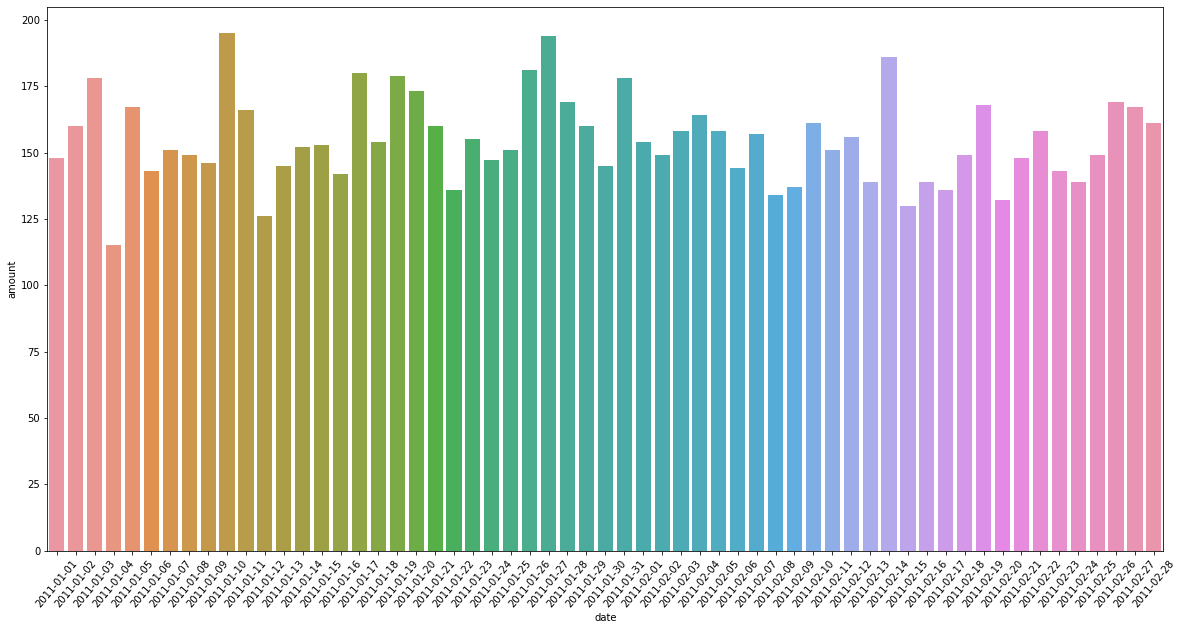

In [84]:
fig = plt.figure(figsize=(20, 10))
plot = sns.barplot(date['date'], date['amount'])
plot.set_xticklabels(labels=date['date'], rotation=50)
plt.show()

- All the info have the same year, so we could hide the year info to do a daily analysis.

- Or we could hide the day and compare month to month.